http://ataspinar.com/2017/05/26/classification-with-scikit-learn/

In [77]:
import pandas as pd
import os
pd.options.display.max_columns=30

In [78]:
df = pd.read_csv('./clean_state.csv', low_memory=False)
ori = df.copy()
df.shape

(1243807, 24)

In [98]:
df.dtypes

id                  int64
city               object
state              object
zip                object
type               object
source             object
association        object
service_type       object
company            object
campaign           object
is_mobile         float64
landing_page       object
contact_page       object
previous_page      object
inbound_number    float64
call_status        object
duration          float64
job_sold          float64
dtype: object

In [103]:
df = ori.copy()

In [104]:
df.head()

,id,name,address,city,state,zip,type,source,association,service_type,received_time,sent_time,company,status,price,campaign,is_mobile,landing_page,contact_page,previous_page,inbound_number,call_status,duration,job_sold
0,1003609,jason,340 colby lane,ambler,PA,NaN,Supercharged Phone Leads,Organic Search,"Basement Systems, Inc.",Foundation Repair,2007-08-01 08:09:22,2007-08-01 08:09:22,BQ Basement Systems,Billable Lead,100.0,Phone Transfer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003610,angelique,2820 dudley ave,bronx,NY,10461,Supercharged Phone Leads,Organic Search,"Basement Systems, Inc.",Basement Waterproofing,2007-08-01 08:13:17,2007-08-01 08:13:17,Quality 1st Basement Systems,Billable Lead,100.0,Phone Transfer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003611,Linda,164 Whiley Road,Groton,MA,01450,Supercharged Web Leads,Organic Search,"Basement Systems, Inc.",Basement Waterproofing,2007-08-01 08:51:41,2007-08-01 08:51:41,Northeast Basement Systems,Billable Lead,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003613,bobby,NaN,durham,NC,NaN,Supercharged Phone Leads,Organic Search,"Basement Systems, Inc.",Basement Waterproofing,2007-08-01 08:10:26,2007-08-01 08:10:26,Regional Waterproofing,Billable Lead,60.0,Phone Transfer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1003614,monica,1611 east elmer rd,east vineland,NJ,NaN,Supercharged Phone Leads,PPC Campaign (clicked on a PPC ad),"Basement Systems, Inc.",Basement Waterproofing,2007-08-01 09:31:39,2007-08-01 09:31:39,Dry Guys Basement Systems,Billable Lead,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [105]:
ck_null = lambda fd: (df[fd].isnull()).sum()
ck_count = lambda fd: df[fd].value_counts().head(10)

In [106]:
for i in df:
    m, n = ck_null(i), df.shape[0]
    print  str(m).ljust(8), n, str(round(m/float(n),4)*100).ljust(5)+' %', i

0        1243807 0.0   % id
3284     1243807 0.26  % name
68868    1243807 5.54  % address
3134     1243807 0.25  % city
0        1243807 0.0   % state
43797    1243807 3.52  % zip
0        1243807 0.0   % type
4        1243807 0.0   % source
367      1243807 0.03  % association
7111     1243807 0.57  % service_type
0        1243807 0.0   % received_time
0        1243807 0.0   % sent_time
172      1243807 0.01  % company
0        1243807 0.0   % status
0        1243807 0.0   % price
939164   1243807 75.51 % campaign
978626   1243807 78.68 % is_mobile
461169   1243807 37.08 % landing_page
613968   1243807 49.36 % contact_page
654039   1243807 52.58 % previous_page
699281   1243807 56.22 % inbound_number
699281   1243807 56.22 % call_status
699281   1243807 56.22 % duration
1221674  1243807 98.22 % job_sold


In [107]:
df = df.fillna('No Data')

In [108]:
df.columns

Index([u'id', u'name', u'address', u'city', u'state', u'zip', u'type',
       u'source', u'association', u'service_type', u'received_time',
       u'sent_time', u'company', u'status', u'price', u'campaign',
       u'is_mobile', u'landing_page', u'contact_page', u'previous_page',
       u'inbound_number', u'call_status', u'duration', u'job_sold'],
      dtype='object')

In [109]:
ck_count('status')

Billable Lead    825202
No Charge        418605
Name: status, dtype: int64

In [110]:
df[df['status']!='Billable Lead']['price'].value_counts()

0.0      416926
90.0        572
100.0       289
120.0       270
60.0        250
75.0        205
50.0         69
80.0          7
85.0          4
35.0          3
130.0         3
200.0         2
150.0         2
30.0          2
125.0         1
Name: price, dtype: int64

In [111]:
# (df['received_time'].isnull()).sum()
# df['zip'].value_counts()
# df['company'].value_counts()
# df['contact_page'].value_counts()

In [112]:
pd.Timestamp(df['sent_time'][0])

Timestamp('2007-08-01 08:09:22')

In [113]:
df['sent_time'][0]

'2007-08-01 08:09:22'

In [114]:
def dm(x):
    try:
        return pd.Timestamp(x)
    except:
        print x
        return x

In [115]:
df['month']=df['sent_time'].apply(lambda x:x.split('-')[1])
df['day']=df['sent_time'].apply(lambda x:x.split('-')[2][:2])
df['hour']=df['sent_time'].apply(lambda x:x.split(' ')[-1][:2])
df.shape

(1243807, 27)

In [116]:
# ck_count('day')

In [117]:
# df['time']=df['sent_time'].apply(dm)
# df.shape

In [118]:
df.columns

Index([u'id', u'name', u'address', u'city', u'state', u'zip', u'type',
       u'source', u'association', u'service_type', u'received_time',
       u'sent_time', u'company', u'status', u'price', u'campaign',
       u'is_mobile', u'landing_page', u'contact_page', u'previous_page',
       u'inbound_number', u'call_status', u'duration', u'job_sold', u'month',
       u'day', u'hour'],
      dtype='object')

In [119]:
df= df.drop(['id','price', 'name', 'address', 'sent_time', 
             'sent_time', 'received_time', 'duration', 'job_sold', 'inbound_number'], axis=1)

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
lb = LabelEncoder()
lb

LabelEncoder()

In [123]:
lb.fit_transform(df['company'])

array([ 86, 620, 551, ..., 623, 706,  12])

In [127]:
lb.inverse_transform(1)

'4th Dimension Concepts'

In [128]:
%%time
def label_encode(df, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(df[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(df[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        df[col] = col_values_transformed
 
to_be_encoded_cols = df.columns.values
label_encode(df, to_be_encoded_cols)

In [132]:
df = df.drop('id', axis=1)

In [133]:
df.head()

,city,state,zip,type,source,association,service_type,company,status,campaign,is_mobile,landing_page,contact_page,previous_page,inbound_number,call_status,month,day,hour
0,43379,44,71023,0,9,0,79,86,0,30,2,0,0,0,33664,1,8,1,8
1,44269,39,4182,0,9,0,23,620,0,30,2,0,0,0,33664,1,8,1,8
2,15030,21,886,1,9,0,23,551,0,25,2,0,0,0,33664,1,8,1,8
3,45713,31,71023,0,9,0,23,639,0,30,2,0,0,0,33664,1,8,1,8
4,45853,35,71023,0,13,0,23,299,0,25,2,0,0,0,33664,1,8,1,9


In [134]:
mark = df.pop('status')
mark.shape

(1243807,)

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [168]:
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [167]:
# df0 = df.iloc[:1000,:]
# y0 = mark.iloc[:1000]
# df1 = df.iloc[1000:1500]
# y1 = mark.iloc[1000:1500]

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [164]:
dim = lambda *x: [i.shape for i in x]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(df, mark, test_size=0.33, random_state=0)
dim(X_train, X_test, y_train, y_test)

[(833350, 18), (410457, 18), (833350,), (410457,)]

In [169]:
%%time
rf.fit(X_train, y_train)
rf

CPU times: user 18.1 s, sys: 28 ms, total: 18.1 s
Wall time: 18.1 s


In [170]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [172]:
pred = rf.predict(X_test)
print pred.shape
pred[:3]

(410457,)


array([0, 1, 0])

In [181]:
accuracy_score(y_test, pred)

0.81610010305586211

In [183]:
rf.feature_importances_

array([ 0.07836604,  0.03096615,  0.11350563,  0.00323515,  0.24224846,
        0.02711833,  0.03714761,  0.04618893,  0.01657631,  0.01034637,
        0.06000942,  0.0288272 ,  0.02482893,  0.06093197,  0.00707007,
        0.06221312,  0.08181211,  0.06860819])

In [184]:
forest = rf

In [188]:
import numpy as np
import matplotlib.pyplot as plt
X=X_train

In [197]:
X.columns[3]

'type'

In [201]:
plt.bar?

In [204]:
indices

array([ 4,  2, 16,  0, 17, 15, 13, 10,  7,  6,  1, 11,  5, 12,  8,  9, 14,
        3])

In [206]:
list(X.columns[indices])

['source',
 'zip',
 'day',
 'city',
 'hour',
 'month',
 'inbound_number',
 'landing_page',
 'company',
 'service_type',
 'state',
 'contact_page',
 'association',
 'previous_page',
 'campaign',
 'is_mobile',
 'call_status',
 'type']

In [209]:
plt.barh?

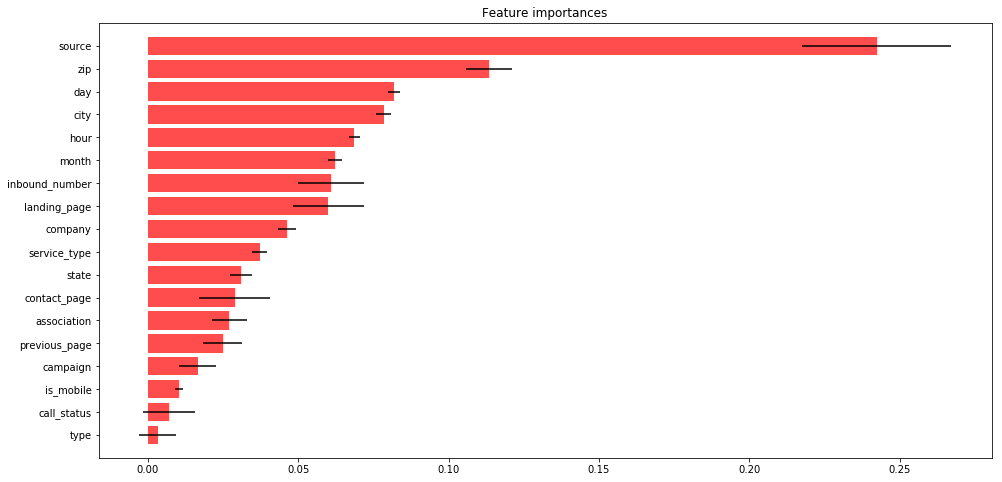

Feature ranking:
1. feature source (0.242248)
2. feature zip (0.113506)
3. feature day (0.081812)
4. feature city (0.078366)
5. feature hour (0.068608)
6. feature month (0.062213)
7. feature inbound_number (0.060932)
8. feature landing_page (0.060009)
9. feature company (0.046189)
10. feature service_type (0.037148)
11. feature state (0.030966)
12. feature contact_page (0.028827)
13. feature association (0.027118)
14. feature previous_page (0.024829)
15. feature campaign (0.016576)
16. feature is_mobile (0.010346)
17. feature call_status (0.007070)
18. feature type (0.003235)


In [220]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]



# Plot the feature importances of the forest
plt.figure(figsize=(16,8))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], 
        align="center", alpha=.7)

plt.yticks(range(X.shape[1]), list(X.columns[indices]))
plt.ylim([-1, X.shape[1]])

plt.gca().invert_yaxis()

plt.show()

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

In [191]:
# cross_val_score(rf, df.values, mark.values, cv=5)

In [148]:
%%time
rf.fit(df0, y0)

CPU times: user 28 ms, sys: 0 ns, total: 28 ms
Wall time: 26.9 ms


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)